In [194]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState()

In [170]:
def generate_T1(t1_min, t1_max, n):
    T1 = [0]
    for _ in range(n):
        T1.append(T1[-1] + (t1_max - t1_min) * rng.rand() + t1_min)
    T1.pop(0)
    return np.asarray(T1)

def generate_t2(t2_min, t2_max, n):
    return (t2_max - t2_min) * rng.rand(n) + t2_min

def simulate(T1, t2):
    last_time = 0
    processed_signals = 0
    for i in range(len(T1)):
        if last_time <= T1[i]:
            last_time = T1[i] + t2[i]
            processed_signals += 1
    return processed_signals

def generate_T1_uni(z, n):
    T1 = [0]
    for _ in range(n):
        T1.append(T1[-1] + z * rng.uniform())
    T1.pop(0)
    return np.asarray(T1)

def full_simulaton_uni(z, s, n):
    T1 = generate_T1_uni(z, n)
    t2 = generate_t2(0, s, n)
    processed_signals = simulate(T1, t2)
    P = processed_signals / n
    return(P)

In [127]:
t1_min = 1
t1_max = 4
t2_min = 1
t2_max = 4

n = 100

In [130]:
T1 = generate_T1(t1_min, t1_max, n)
t2 = generate_t2(t2_min, t2_max, n)

# print(f'Моменты поступления сигналов: {T1}')
# print(f'Время обработки сигналов: {t2}')

processed_signals = simulate(T1, t2)
P = processed_signals / n

print(f'Число обработанных сигналов: {processed_signals}')
print(f'Вероятность обработки сигналов: {P}')

if P < 0.95:
    print('Условие не выполнено (P<0.95)')
else:
    print('Условие выполнено (P>=0.95)')

Число обработанных сигналов: 65
Вероятность обработки сигналов: 0.65
Условие не выполнено (P<0.95)


In [133]:
Tz = [10, 4, 1.33]
Ts = [10, 4, 1.33]

In [138]:
P = full_simulaton_uni(Tz[0], Ts[0], n)
P

0.58

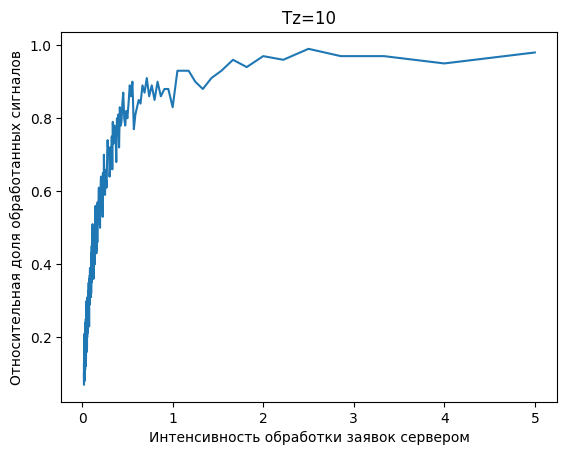

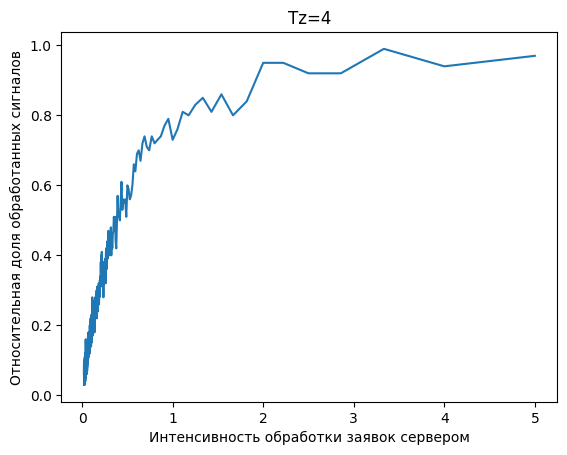

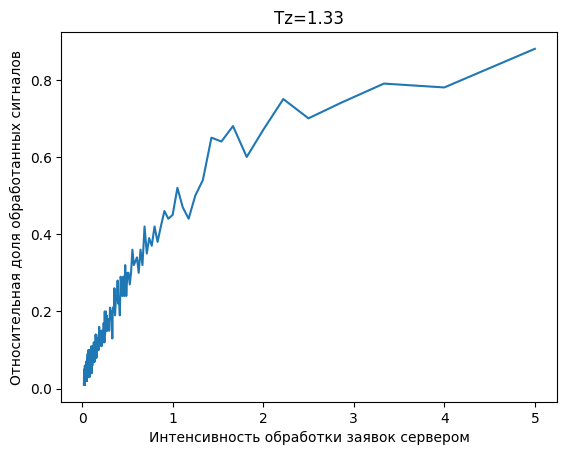

In [215]:
for i in range(len(Tz)):
    z = Tz[i]
    all_s = np.arange(0.4, 100, step=0.1)[::-1]
    ps = [full_simulaton_uni(z, s, n) for s in all_s]
    y = [2 / s for s in all_s]
    plt.title(f'Tz={z}')
    plt.plot(y, ps)
    plt.xlabel("Интенсивность обработки заявок сервером")
    plt.ylabel("Относительная доля обработанных сигналов")
    plt.show()

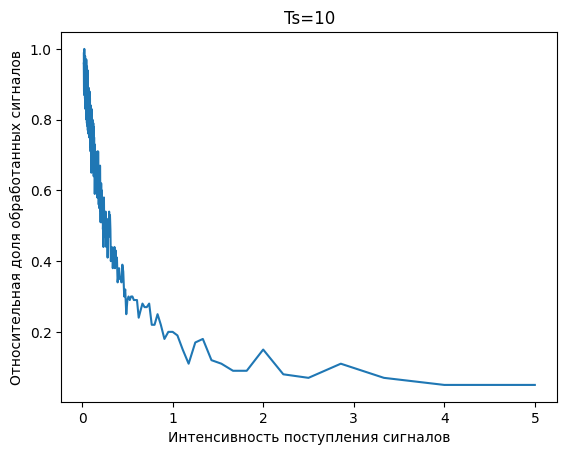

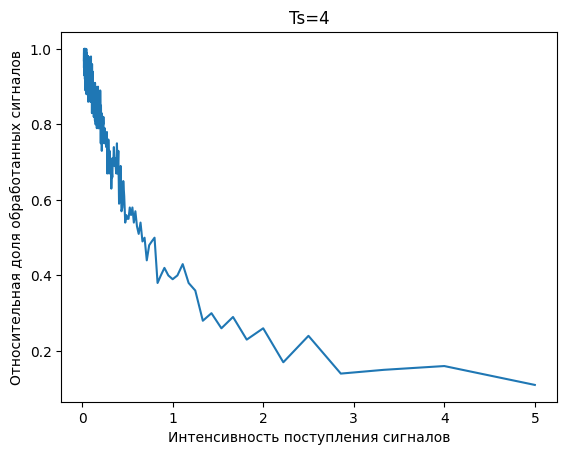

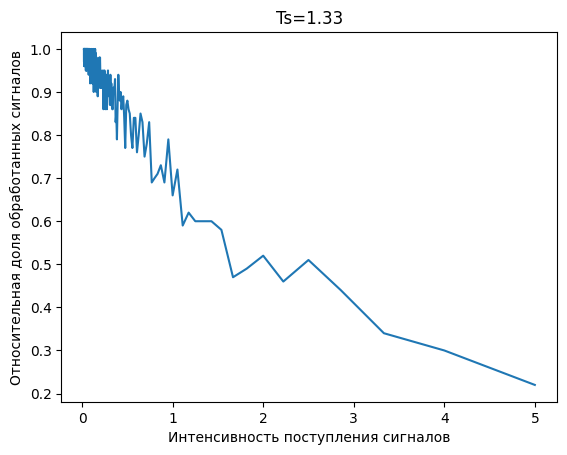

In [218]:
for i in range(len(Ts)):
    s = Ts[i]
    all_z = np.arange(0.4, 100, step=0.1)[::-1]
    pz = [full_simulaton_uni(z, s, n) for z in all_z]
    y = [2 / z for z in all_z]
    plt.title(f'Ts={s}')
    plt.plot(y, pz)
    plt.xlabel("Интенсивность поступления сигналов")
    plt.ylabel("Относительная доля обработанных сигналов")
    plt.show()

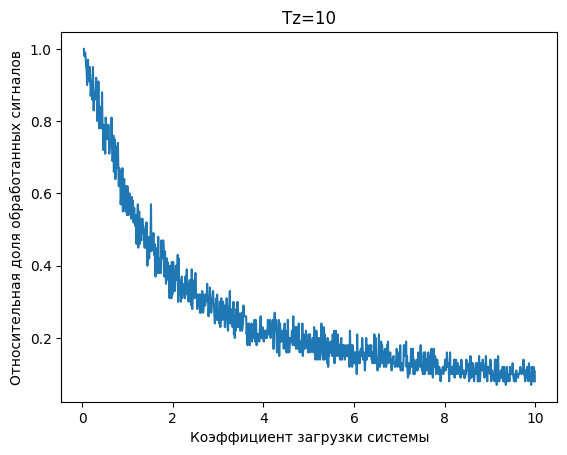

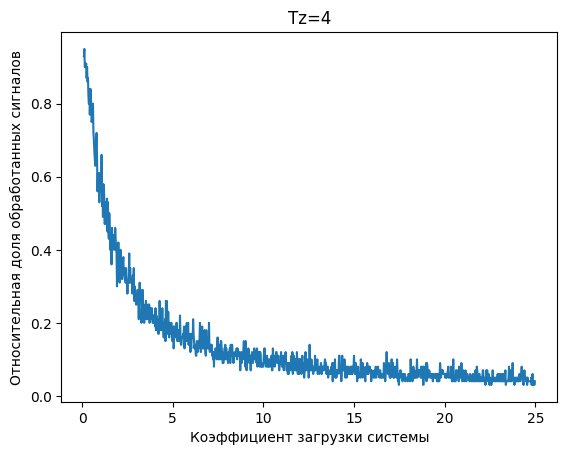

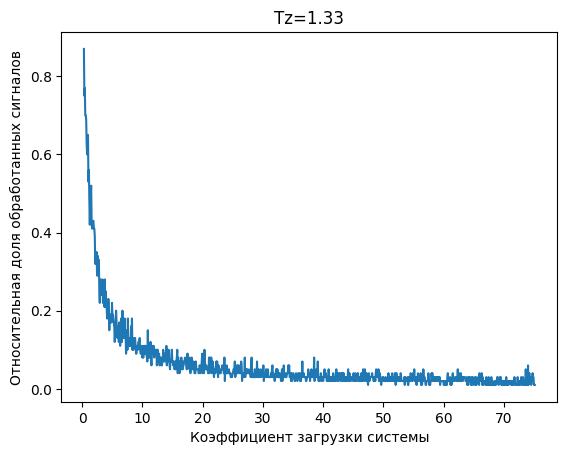

In [220]:
for i in range(len(Tz)):
    z = Tz[i]
    all_s = np.arange(0.4, 100, step=0.1)
    ps = [full_simulaton_uni(z, s, n) for s in all_s]
    y = all_s / z
    plt.title(f'Tz={z}')
    plt.plot(y, ps)
    plt.xlabel("Коэффициент загрузки системы")
    plt.ylabel("Относительная доля обработанных сигналов")
    plt.show()